In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [1]:
from keras.applications.vgg16 import VGG16
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [4]:
import glob
import pandas as pd
# 先不讀取圖片, 真的要訓練才讀
df = pd.DataFrame(columns=["path", "target"])
for p in glob.glob("train/cat.*.jpg"):
    s = pd.Series([p, 0], index=["path", "target"])
    df = df.append(s, ignore_index=True)
for p in glob.glob("train/dog.*.jpg"):
    s = pd.Series([p, 1], index=["path", "target"])
    df = df.append(s, ignore_index=True)
df

,path,target
0,train/cat.5077.jpg,0
1,train/cat.2718.jpg,0
2,train/cat.10151.jpg,0
3,train/cat.3406.jpg,0
4,train/cat.4369.jpg,0
5,train/cat.7660.jpg,0
6,train/cat.8553.jpg,0
7,train/cat.9895.jpg,0
8,train/cat.1211.jpg,0
9,train/cat.6218.jpg,0


train/dog.2702.jpg
(300, 315)


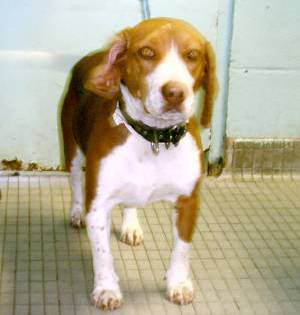

In [13]:
from keras.preprocessing.image import load_img
import random
c = random.randint(0, 24999)
print(df["path"][c])
img = load_img(df["path"][c])
print(img.size)
img

(224, 224)


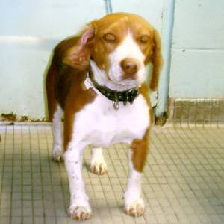

In [14]:
img = load_img(df["path"][c], target_size=(224, 224))
print(img.size)
img

In [22]:
from keras.models import Model
from keras.layers import Flatten, Dense
x = Flatten()(vgg.output)
x = Dense(units=2048, activation="relu")(x)
x = Dense(units=256, activation="relu")(x)
# 貓和狗分類: units = 1, units = 2 都可以
#         : sigmoid  , softmax
x = Dense(units=2, activation="softmax")(x)
cnn = Model(inputs=vgg.input, outputs=x)
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________